In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:

# Load data
df = pd.read_csv("./ML471_S4_Datafile_Practice.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df = df.asfreq("ME")

# Target
y = df["Close"]

# ✅ ONLY true exogenous variable
exog = df[["Volume"]]

# Align data
data = pd.concat([y, exog], axis=1).dropna()
y = data["Close"]
exog = data[["Volume"]]


In [4]:

# Train-test split
train_size = int(len(y) * 0.8)
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
exog_train, exog_test = exog.iloc[:train_size], exog.iloc[train_size:]

# SARIMAX model
model = SARIMAX(
    y_train,
    exog=exog_train,
    order=(1, 0, 1),
    seasonal_order=(3, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()

# ✅ One-step-ahead prediction
pred = results.get_prediction(
    start=y_test.index[0],
    end=y_test.index[-1],
    exog=exog_test,
    dynamic=False
)

forecast = pred.predicted_mean


d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


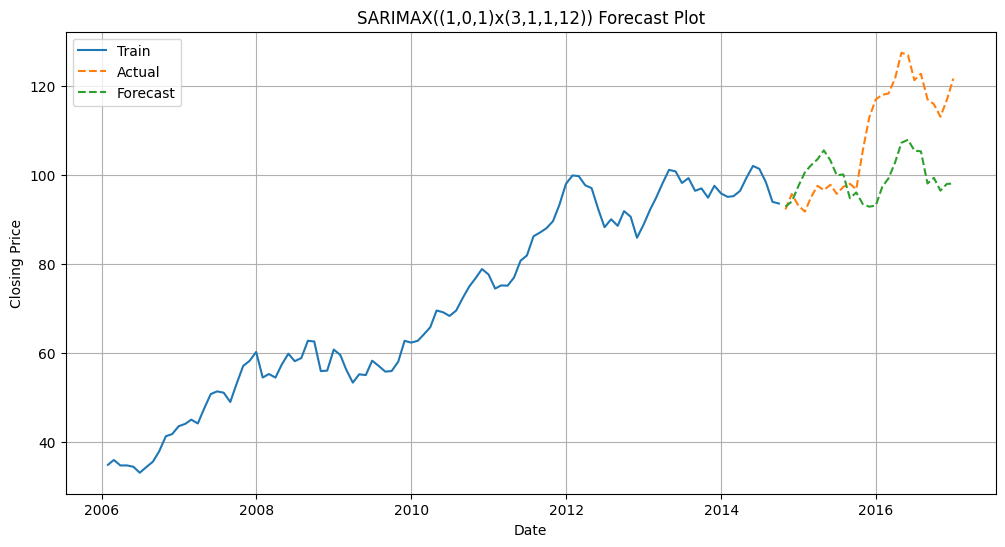

In [5]:

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label="Train")
plt.plot(y_test.index, y_test, linestyle="--", label="Actual")
plt.plot(forecast.index, forecast, linestyle="--", label="Forecast")

plt.title("SARIMAX((1,0,1)x(3,1,1,12)) Forecast Plot")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()